<a href="https://www.kaggle.com/code/alonamoiseyenko/my9notebook?scriptVersionId=200098814" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [108]:
import pandas as pd
import numpy as np

In [109]:
df = pd.read_csv("/kaggle/input/small-nice-data-dota2/small_nice_data.csv",
                 index_col=0)

df.head()

,time,radiant_roshankill,radiant_Δroshankill,dire_roshankill,dire_Δroshankill,good_tower1,good_tower2,good_tower3,good_melee,good_range,...,radiant_buyback,dire_buyback,radiant_Δrunes,dire_Δrunes,radiant_runes,dire_runes,radiant_aegis,dire_aegis,radiantΔaegis,direΔaegis
0,0,0,0,0,0,3,3,3,3,3,...,0,0,1,1,1,1,0,0,0,0
1,60,0,0,0,0,3,3,3,3,3,...,0,0,1,1,2,2,0,0,0,0
2,120,0,0,0,0,3,3,3,3,3,...,0,0,0,0,2,2,0,0,0,0
3,180,0,0,0,0,3,3,3,3,3,...,0,0,0,0,2,2,0,0,0,0
4,240,0,0,0,0,3,3,3,3,3,...,0,0,0,0,2,2,0,0,0,0


In [110]:
df.describe()

,time,radiant_roshankill,radiant_Δroshankill,dire_roshankill,dire_Δroshankill,good_tower1,good_tower2,good_tower3,good_melee,good_range,...,radiant_buyback,dire_buyback,radiant_Δrunes,dire_Δrunes,radiant_runes,dire_runes,radiant_aegis,dire_aegis,radiantΔaegis,direΔaegis
count,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,...,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000,164300.000000
mean,1072.197079,0.285813,0.022069,0.197663,0.016932,1.661540,2.553670,2.872051,2.906032,2.916226,...,0.438497,0.423177,0.606409,0.596884,11.661236,11.479075,0.274583,0.187182,0.021272,0.016196
std,734.369752,0.607209,0.146910,0.491219,0.129019,1.229113,0.879006,0.467094,0.397592,0.376865,...,1.134580,1.116944,0.904239,0.900847,8.688824,8.478081,0.589938,0.476634,0.144290,0.126229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,480.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,1020.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000
75%,1560.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,1.000000,1.000000,17.000000,17.000000,0.000000,0.000000,0.000000,0.000000
max,5820.000000,6.000000,1.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,21.000000,19.000000,6.000000,7.000000,134.000000,106.000000,5.000000,5.000000,1.000000,1.000000


In [111]:
df.shape

(164300, 83)

In [112]:
y = df['time']
X = df.drop(columns='time')

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [114]:
X_train.shape, X_test.shape

((131440, 82), (32860, 82))

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [116]:
num_columns = X.select_dtypes(include='number').columns
cat_columns = X.select_dtypes(include='object').columns

num_transformer = Pipeline(
    steps=[('impute', SimpleImputer(strategy='median'))]
)

cat_transformer = Pipeline(
    steps=[('impute', SimpleImputer(strategy='most_frequent')),
           ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value',
                                     unknown_value=-1
                                     ))
          ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_columns),
        ('cat', cat_transformer, cat_columns)
    ]
)

preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['radiant_roshankill', 'radiant_Δroshankill', 'dire_roshankill',
       'dire_Δroshankill', 'good_tower1', 'good_tower2', 'good_tower3',
       'good_melee', 'good_range', 'good_fort', 'bad_tower1', 'bad_tower2',
       'bad_tower3', 'bad_melee', 'bad_range', 'bad_fort', 'id', 'y'...
       'radiant_buyback', 'dire_buyback', 'radiant_Δrunes', 'dire_Δrunes',
       'radiant_runes', 'dire_runes', 'radiant_aegis', 'dire_aegis',
       'radiantΔaegis', 'direΔaegis'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 Index([], dtype='object'))])

In [117]:
preprocessor.fit(X_train)
X_train_prep = preprocessor.transform(X_train)
X_test_prep = preprocessor.transform(X_test)

X_train_prep

,num__radiant_roshankill,num__radiant_Δroshankill,num__dire_roshankill,num__dire_Δroshankill,num__good_tower1,num__good_tower2,num__good_tower3,num__good_melee,num__good_range,num__good_fort,...,num__radiant_buyback,num__dire_buyback,num__radiant_Δrunes,num__dire_Δrunes,num__radiant_runes,num__dire_runes,num__radiant_aegis,num__dire_aegis,num__radiantΔaegis,num__direΔaegis
149377,0.0,0.0,0.0,0.0,1.0,3.0,3.0,3.0,3.0,1.0,...,0.0,0.0,2.0,1.0,10.0,14.0,0.0,0.0,0.0,0.0
111559,0.0,0.0,1.0,0.0,1.0,3.0,3.0,3.0,3.0,1.0,...,0.0,1.0,0.0,0.0,20.0,18.0,0.0,1.0,0.0,0.0
125862,1.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,3.0,1.0,...,0.0,0.0,0.0,1.0,18.0,21.0,1.0,0.0,0.0,0.0
17224,0.0,0.0,0.0,0.0,1.0,3.0,3.0,3.0,3.0,1.0,...,0.0,0.0,0.0,1.0,9.0,8.0,0.0,0.0,0.0,0.0
120570,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,3.0,1.0,...,0.0,0.0,0.0,2.0,9.0,17.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120204,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,1.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
103933,0.0,0.0,0.0,0.0,2.0,3.0,3.0,3.0,3.0,1.0,...,0.0,0.0,2.0,3.0,11.0,11.0,0.0,0.0,0.0,0.0
132257,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,1.0,...,0.0,0.0,1.0,1.0,8.0,5.0,0.0,0.0,0.0,0.0
147249,1.0,0.0,0.0,0.0,2.0,3.0,3.0,3.0,3.0,1.0,...,0.0,0.0,0.0,0.0,15.0,8.0,1.0,0.0,0.0,0.0


In [118]:
X_train.nunique()

radiant_roshankill      7
radiant_Δroshankill     2
dire_roshankill         6
dire_Δroshankill        2
good_tower1             4
                       ..
dire_runes             82
radiant_aegis           6
dire_aegis              6
radiantΔaegis           2
direΔaegis              2
Length: 82, dtype: int64

In [119]:
import lightgbm as lgb

In [120]:
model = lgb.LGBMRegressor(objective='mae',
                          n_estimators=500)

In [121]:
model.fit(X_train_prep, y_train,
          eval_set=[(X_test_prep, y_test), (X_train_prep, y_train)],
          eval_names = ['test', 'train'],
          eval_metric='mse')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.241055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8357
[LightGBM] [Info] Number of data points in the train set: 131440, number of used features: 82
[LightGBM] [Info] Start training from score 1020.000000


LGBMRegressor(n_estimators=500, objective='mae')

In [122]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [123]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train_prep))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test_prep))

all_metrics

,train,test
MAE,30.15,30.83
RMSE,50.75,52.54
R2,1.00,0.99


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

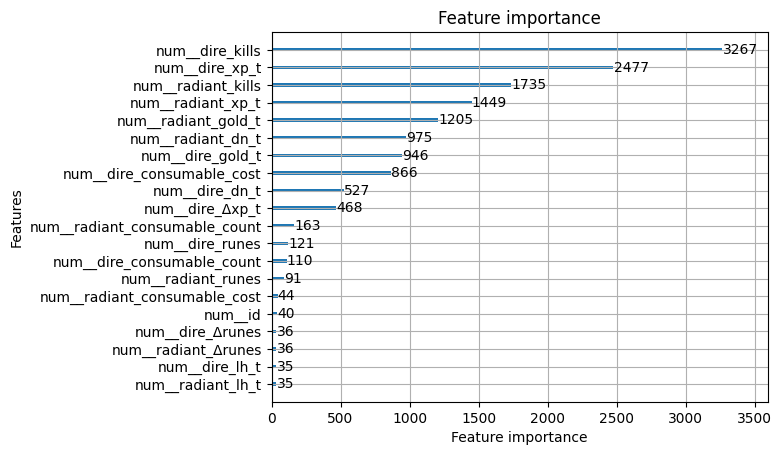

In [124]:
lgb.plot_importance(model, max_num_features=20)

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l2'>

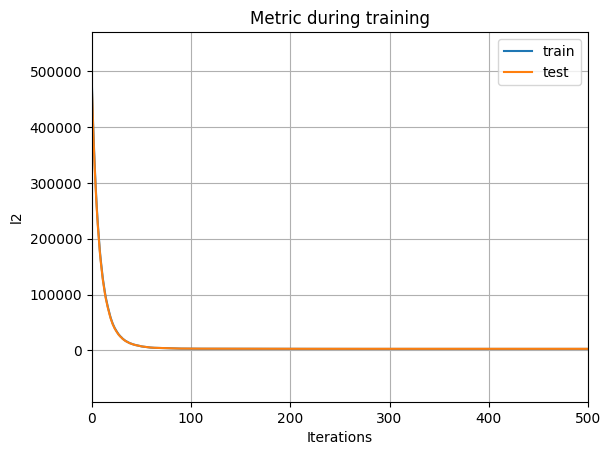

In [125]:
lgb.plot_metric(model,
                metric='l2')

In [126]:
model = Pipeline(
    [("prep", preprocessor),
     ("model", model)
     ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['radiant_roshankill', 'radiant_Δroshankill', 'dire_roshankill',
       'dire_Δroshankill', 'good_tower1', 'good_tower2', 'good_tower3',
       'good_melee', 'good_range', 'good_fort', 'bad_tower1', 'bad_tower2',
       'bad_tower3', 'bad_melee', 'bad_ra...
       'radiant_buyback', 'dire_buyback', 'radiant_Δrunes', 'dire_Δrunes',
       'radiant_runes', 'dire_runes', 'radiant_aegis', 'dire_aegis',
       'radiantΔaegis', 'direΔaegis'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index([], dtype='object'))])),
                ('model', LGBMRegressor(n_estimators=500, objective='mae'))])

In [127]:
import joblib
joblib.dump(model, 'my_model.pkl')

load_model = joblib.load('my_model.pkl')
load_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['radiant_roshankill', 'radiant_Δroshankill', 'dire_roshankill',
       'dire_Δroshankill', 'good_tower1', 'good_tower2', 'good_tower3',
       'good_melee', 'good_range', 'good_fort', 'bad_tower1', 'bad_tower2',
       'bad_tower3', 'bad_melee', 'bad_ra...
       'radiant_buyback', 'dire_buyback', 'radiant_Δrunes', 'dire_Δrunes',
       'radiant_runes', 'dire_runes', 'radiant_aegis', 'dire_aegis',
       'radiantΔaegis', 'direΔaegis'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index([], dtype='object'))])),
                ('model', LGBMRegressor(n_estimators=500, objective='mae'))])